In [1]:
PATH="C:\\Users\\98gud\\Desktop\\paper\\ieee-fraud-detection\\"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from tqdm.notebook import tqdm
from sklearn.decomposition import PCA

In [2]:
test_identity=pd.read_csv(PATH+"test_identity.csv")
test_transaction=pd.read_csv(PATH+"test_transaction.csv")
train_identity=pd.read_csv(PATH+"train_identity.csv")
train_transaction=pd.read_csv(PATH+"train_transaction.csv")

display(test_identity.head())
display(train_identity.head())

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
display(test_transaction.head())
display(train_transaction.head())

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## train_transaction 에 isfraud 항목이 있음

In [9]:
print(train_transaction.shape)
print(train_identity.shape)
print(test_transaction.shape)
print(test_identity.shape)

(590540, 394)
(144233, 41)
(506691, 393)
(141907, 41)


In [3]:
train_y=train_transaction[['TransactionID','isFraud']]

In [12]:
display(train_y.head())

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0


In [15]:
train_y[['isFraud']].value_counts()

isFraud
0          569877
1           20663
dtype: int64

In [5]:
#print(list(train_identity.columns))
#print(list(train_transaction.columns))

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',

# _____________________________________#

<AxesSubplot:>

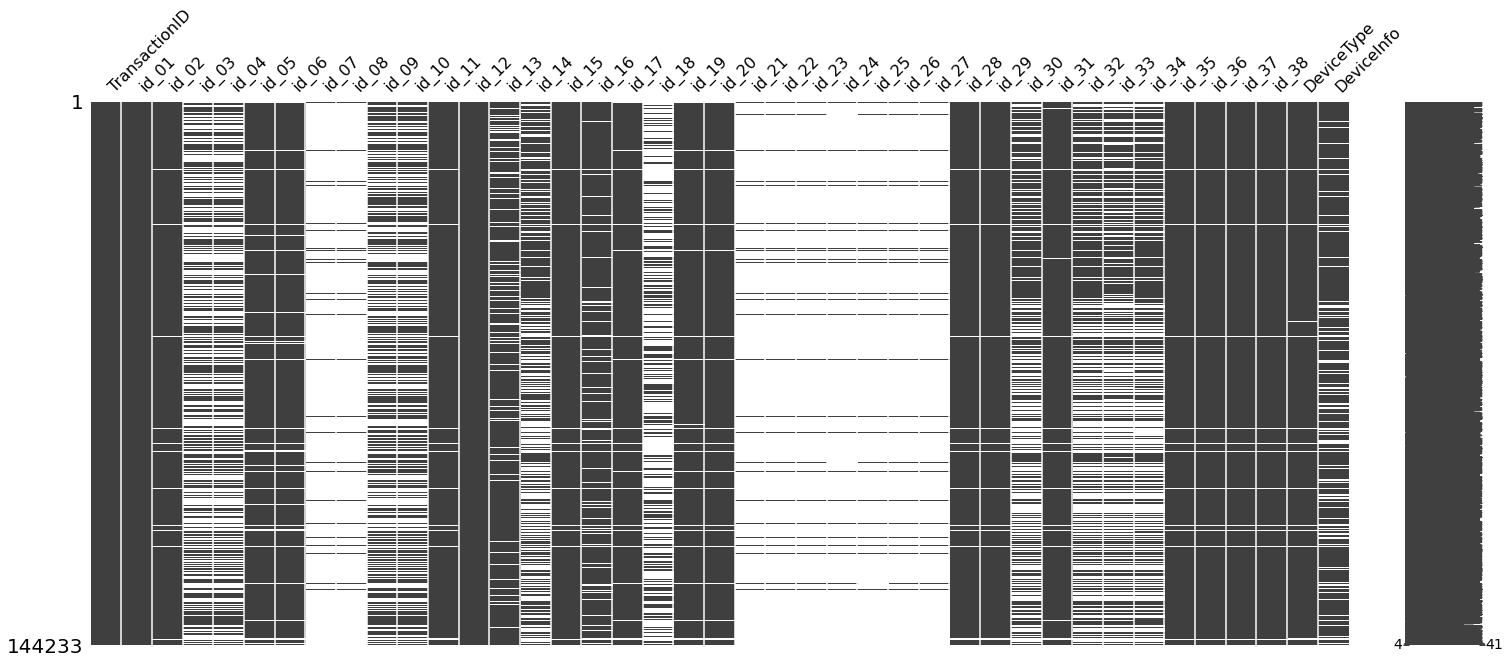

In [17]:
missingno.matrix(train_identity)

<AxesSubplot:>

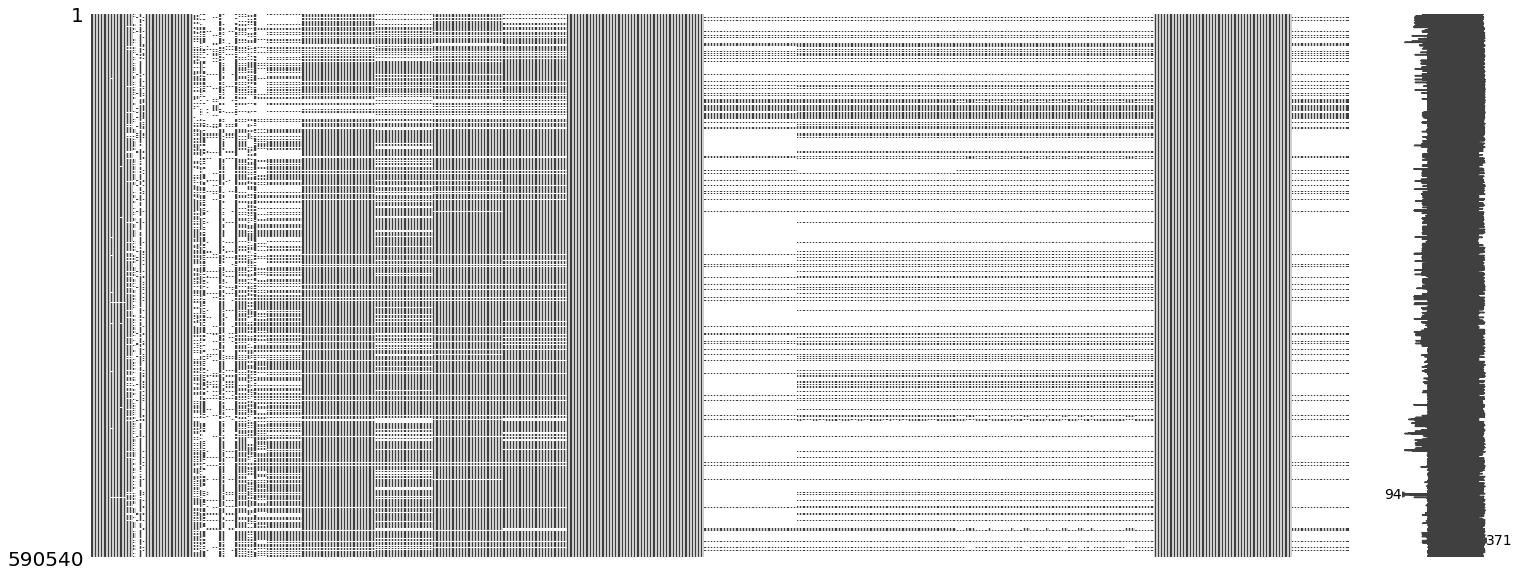

In [18]:
missingno.matrix(train_transaction)

<AxesSubplot:>

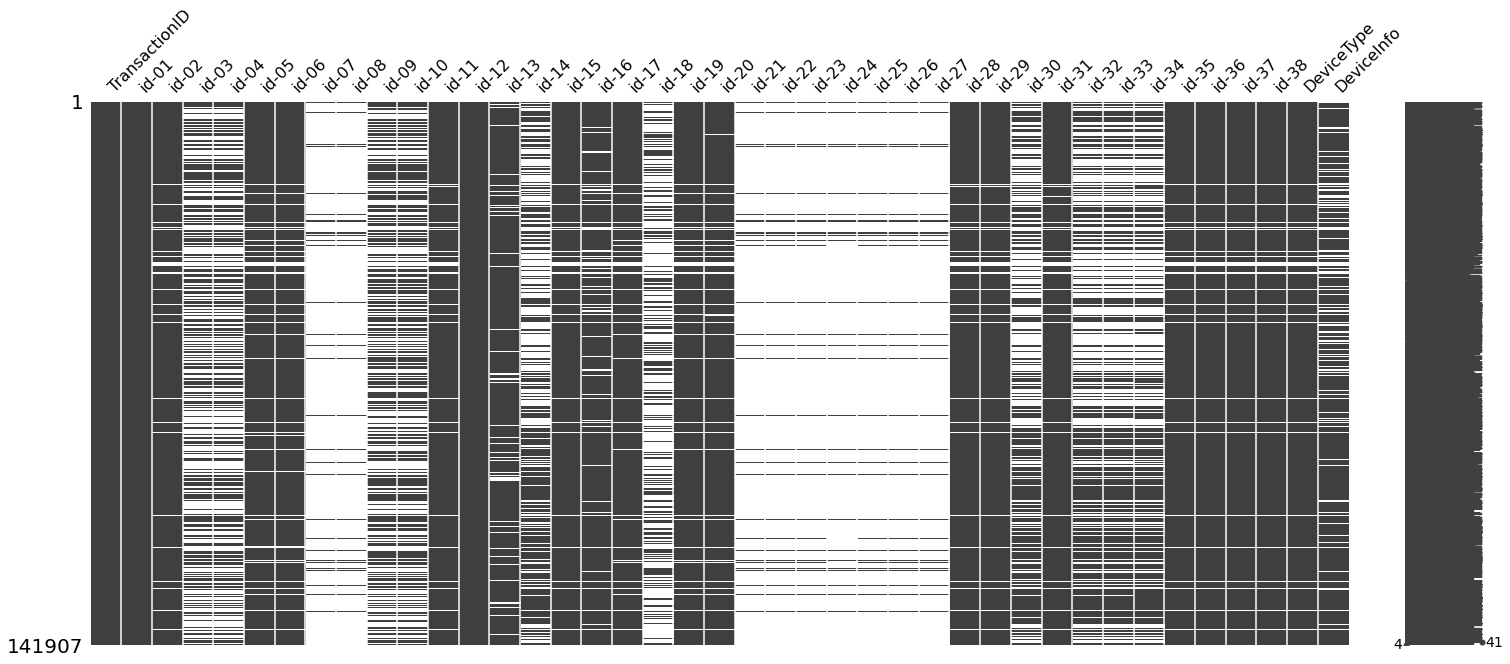

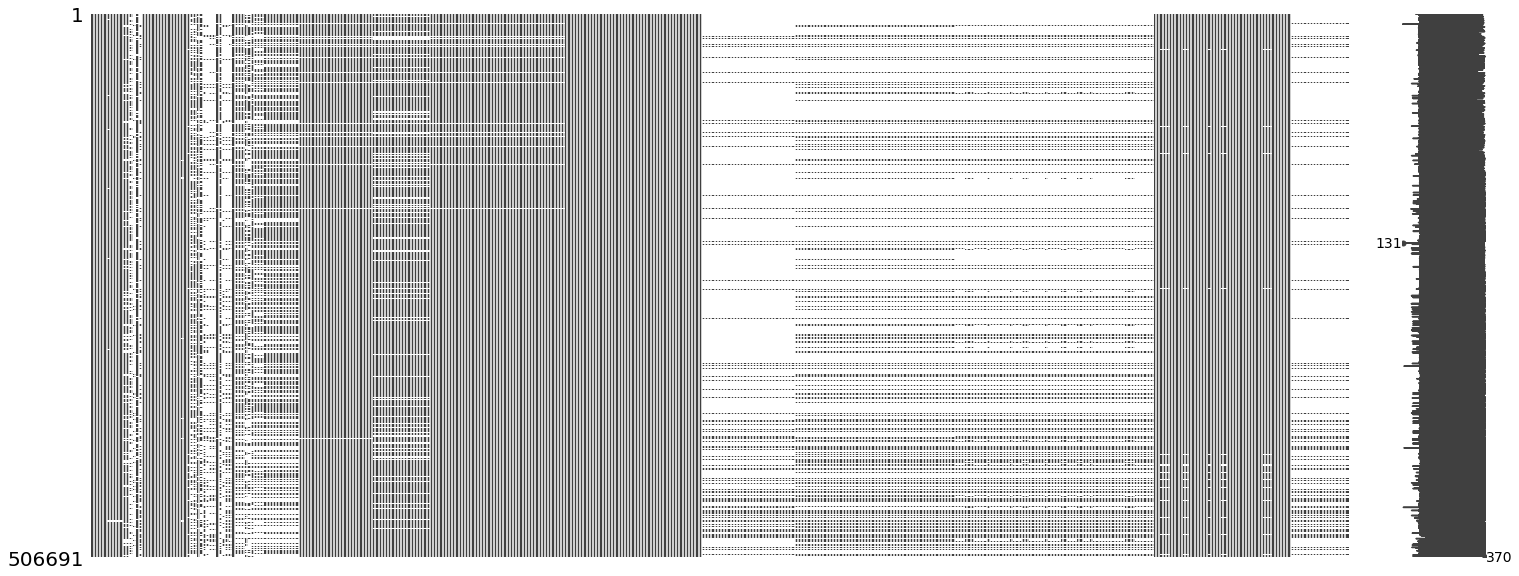

In [19]:
missingno.matrix(test_identity)
missingno.matrix(test_transaction)

In [26]:
#print(train_identity.isnull().sum()/train_identity.shape[0])
#print(train_transaction.isnull().sum()/train_transaction.shape[0])
#print(test_identity.isnull().sum()/test_identity.shape[0])
#print(test_transaction.isnull().sum()/test_transaction.shape[0])

TransactionID    0.000000
id_01            0.000000
id_02            0.023303
id_03            0.540161
id_04            0.540161
id_05            0.051084
id_06            0.051084
id_07            0.964259
id_08            0.964259
id_09            0.480521
id_10            0.480521
id_11            0.022568
id_12            0.000000
id_13            0.117262
id_14            0.445037
id_15            0.022519
id_16            0.103257
id_17            0.033723
id_18            0.687221
id_19            0.034077
id_20            0.034472
id_21            0.964231
id_22            0.964162
id_23            0.964162
id_24            0.967088
id_25            0.964419
id_26            0.964204
id_27            0.964162
id_28            0.022568
id_29            0.022568
id_30            0.462224
id_31            0.027393
id_32            0.462079
id_33            0.491871
id_34            0.460560
id_35            0.022519
id_36            0.022519
id_37            0.022519
id_38       

In [62]:
#tri_idx=sorted(train_identity.TransactionID)
#trt_idx=sorted(train_transaction.TransactionID)
#tei_idx=sorted(test_identity.TransactionID)
#tet_idx=sorted(test_transaction.TransactionID)

#print(f"train identity와 train transaction 중 train identity에만 있는 인덱스 : {len(set(tri_idx)-set(trt_idx))}")
#print(f"train identity와 test identity 중 train identity에만 있는 인덱스 : {len(set(tri_idx)-set(tei_idx))}")
#print(f"train identity와 train transaction 중 train transaction에만 있는 인덱스 : {len(set(trt_idx)-set(tri_idx))}")


train identity와 train transaction 중 train identity에만 있는 인덱스 : 0
train identity와 test identity 중 train identity에만 있는 인덱스 : 144233
train identity와 train transaction 중 train transaction에만 있는 인덱스 : 446307


In [65]:
## train_transaction에는 모든 고객들이 있지만, train_identity에는 모든 고객이 있는 것은 아님,
## 하지만 다행히도 train_transaction 에 isfraud 칼럼이 있기 때문에 모든 고객의 fraud 여부를 알 수 있음

## 그렇지만 ... transaction 과 identity를 합치면서 발생하는 null 값들은 모두 어떻게 처리할 것인가? 0으로 할 것인가? 

<AxesSubplot:>

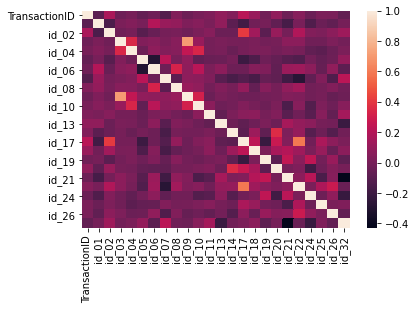

In [67]:
sns.heatmap(train_identity.corr())

<AxesSubplot:>

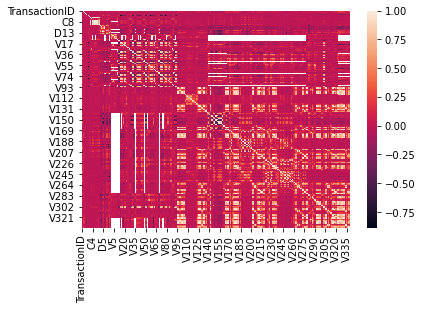

In [68]:
sns.heatmap(train_transaction.corr())

In [4]:
del_tt=[]
for col in train_transaction.columns:
    if train_transaction[col].isnull().sum()/train_transaction.shape[0]>0.5:
        train_transaction.drop(train_transaction[[col]],axis=1,inplace=True)
        del_tt.append(col)

In [7]:
len(del_tt)

174

In [10]:
print(del_tt)

['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', '

In [24]:
#for col in del_tt:
#    print(f"{col}의 비율: {train_transaction[col].isnull().sum()/train_transaction.shape[0]}")

dist1의 비율: 0.596523520845328
dist2의 비율: 0.9362837403054831
R_emaildomain의 비율: 0.7675161716395164
D5의 비율: 0.524674027161581
D6의 비율: 0.8760676668811597
D7의 비율: 0.9340992989467267
D8의 비율: 0.8731229044603245
D9의 비율: 0.8731229044603245
D12의 비율: 0.8904104717715988
D13의 비율: 0.8950926270870728
D14의 비율: 0.8946946862193924
M5의 비율: 0.5934940901547736
M7의 비율: 0.5863531682866528
M8의 비율: 0.5863311545365258
M9의 비율: 0.5863311545365258
V138의 비율: 0.8612371727571375
V139의 비율: 0.8612371727571375
V140의 비율: 0.8612371727571375
V141의 비율: 0.8612371727571375
V142의 비율: 0.8612371727571375
V143의 비율: 0.8612270125647712
V144의 비율: 0.8612270125647712
V145의 비율: 0.8612270125647712
V146의 비율: 0.8612371727571375
V147의 비율: 0.8612371727571375
V148의 비율: 0.8612371727571375
V149의 비율: 0.8612371727571375
V150의 비율: 0.8612270125647712
V151의 비율: 0.8612270125647712
V152의 비율: 0.8612270125647712
V153의 비율: 0.8612371727571375
V154의 비율: 0.8612371727571375
V155의 비율: 0.8612371727571375
V156의 비율: 0.8612371727571375
V157의 비율: 0.86123717275713

C:\Users\98gud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='D8', ylabel='isFraud'>

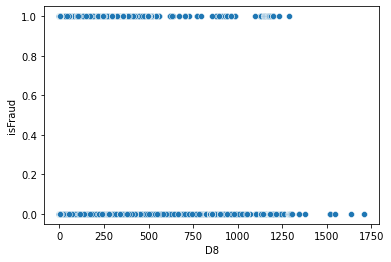

In [76]:
#sns.scatterplot(train_transaction['D8'],train_y['isFraud'])

In [58]:
train_transaction['dist1'].shape

(590540,)

In [69]:
train_y

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0
...,...,...
590535,3577535,0
590536,3577536,0
590537,3577537,0
590538,3577538,0


In [43]:
train_transaction[['V138', 'V139', 'V140', 'V141', 'V142']].corr()

,V138,V139,V140,V141,V142
V138,1.000000,0.361921,0.355494,0.526152,0.397407
V139,0.361921,1.000000,0.945770,0.215163,0.159916
V140,0.355494,0.945770,1.000000,0.294439,0.285190
V141,0.526152,0.215163,0.294439,1.000000,0.877733
V142,0.397407,0.159916,0.285190,0.877733,1.000000


<AxesSubplot:>

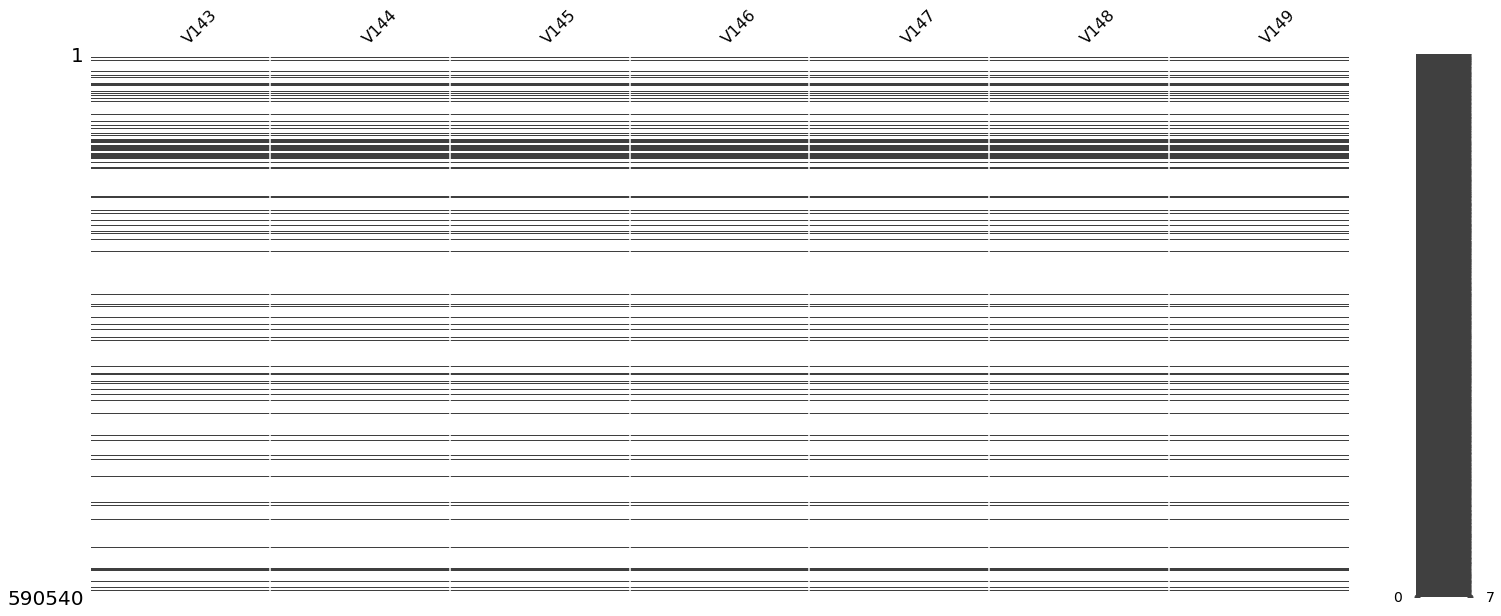

In [38]:
missingno.matrix(train_transaction[[ 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149']])

In [ ]:
missingno.matrix(train_transaction[['M7','M8','M9']])

<AxesSubplot:>

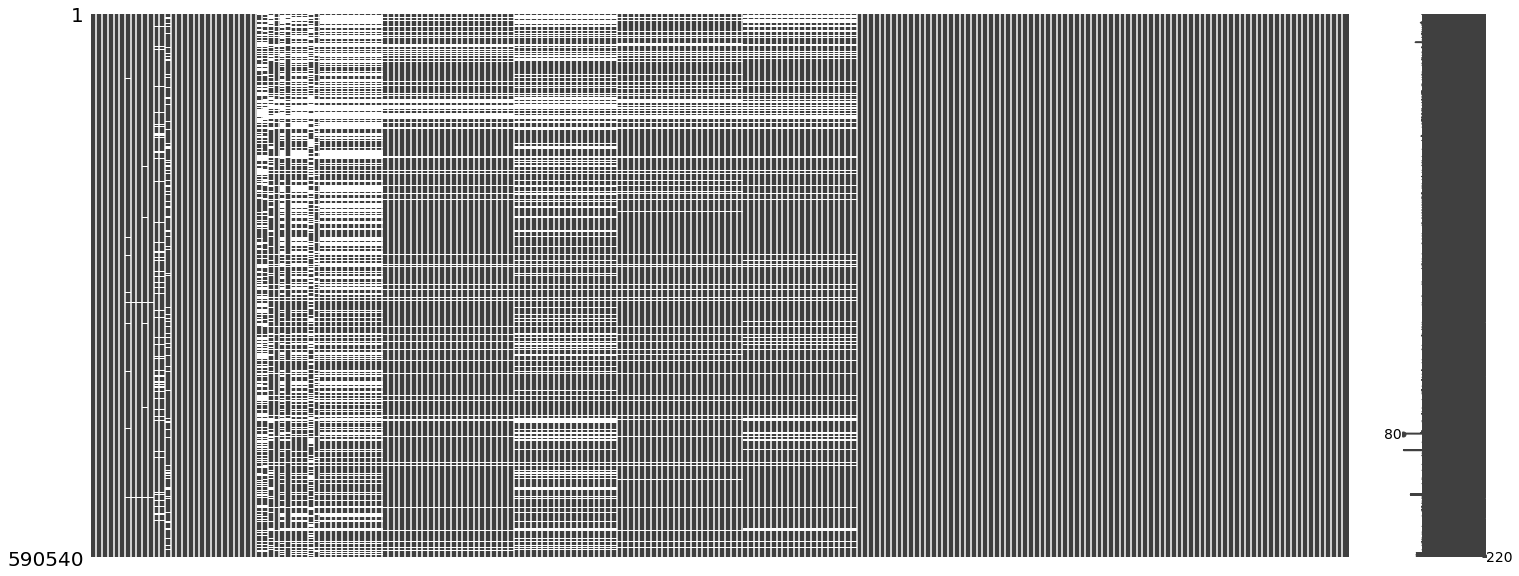

In [5]:
missingno.matrix(train_transaction)

In [6]:
train_transaction.shape

(590540, 220)

In [6]:
del_ti=[]
for col in train_identity.columns:
    if train_identity[col].isnull().sum()/train_identity.shape[0]>0.5:
        train_identity.drop(train_identity[[col]],axis=1,inplace=True)
        del_ti.append(col)

In [7]:
print(len(del_ti))
for col in del_ti:
    print(f"{col}의 비율: {train_identity[col].isnull().sum()/train_identity.shape[0]}")

0


In [ ]:
train_identity

<AxesSubplot:>

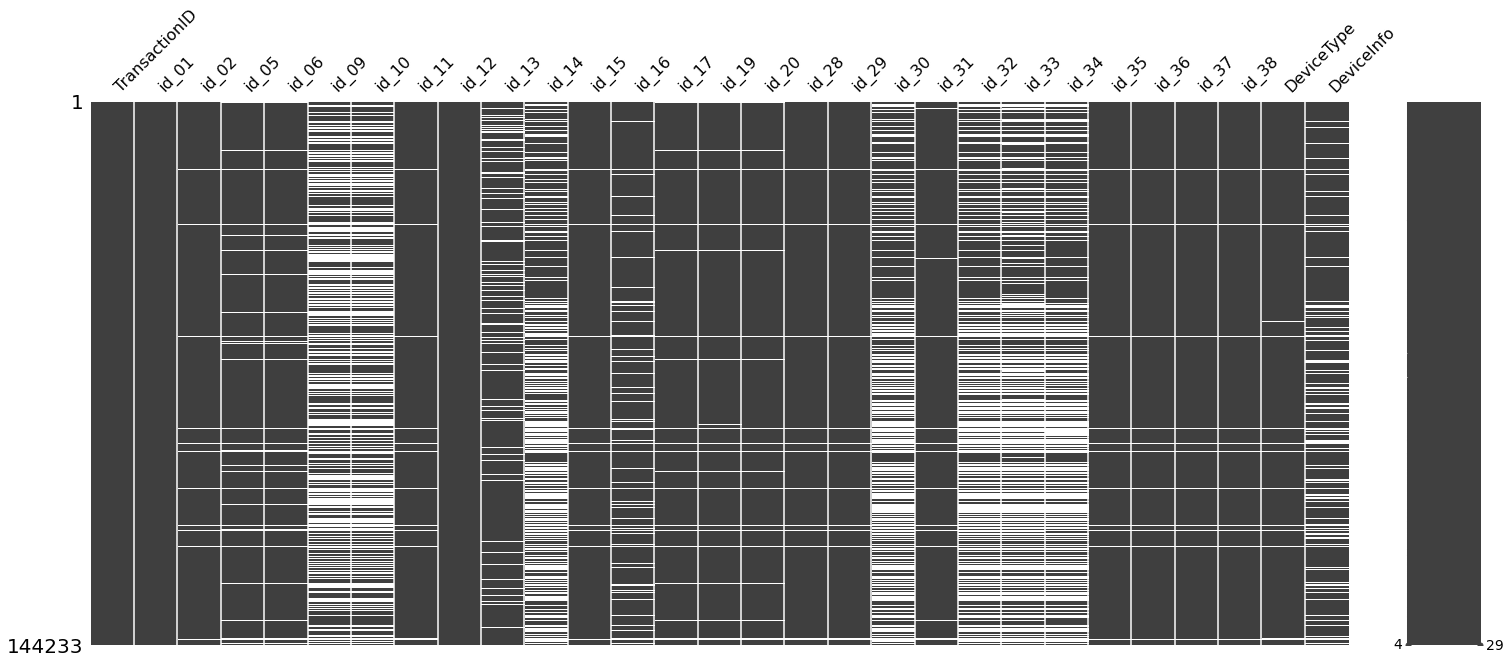

In [8]:
missingno.matrix(train_identity)

In [9]:
train_identity.shape

(144233, 29)

In [12]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 220, dtype: object

# __________________________________#

In [78]:
train_transaction[['V138']].isnull().sum()

V138    508595
dtype: int64

In [131]:
train_transaction.loc[train_transaction['R_emaildomain'].isnull(),['isFraud']].value_counts()

isFraud
0          443813
1            9436
dtype: int64

In [101]:
train_transaction.loc[train_transaction['V322'].isnull(),['isFraud']].value_counts()

isFraud
0          491212
1           16977
dtype: int64

In [133]:
#grouped=train_transaction.groupby('R_emaildomain')
#grouped.mean()['isFraud']

R_emaildomain
aim.com             0.027778
anonymous.com       0.029130
aol.com             0.034855
att.net             0.000000
bellsouth.net       0.004739
cableone.net        0.000000
centurylink.net     0.000000
cfl.rr.com          0.000000
charter.net         0.039370
comcast.net         0.011589
cox.net             0.023965
earthlink.net       0.075949
embarqmail.com      0.000000
frontier.com        0.000000
frontiernet.net     0.000000
gmail               0.000000
gmail.com           0.119184
gmx.de              0.000000
hotmail.co.uk       0.000000
hotmail.com         0.077793
hotmail.de          0.000000
hotmail.es          0.068493
hotmail.fr          0.000000
icloud.com          0.128755
juno.com            0.000000
live.com            0.049869
live.com.mx         0.058355
live.fr             0.000000
mac.com             0.009174
mail.com            0.377049
me.com              0.019784
msn.com             0.001174
netzero.com         0.000000
netzero.net         0.222222


In [142]:
print(len(train_transaction['TransactionID'].unique()))
print(train_transaction.shape)

590540
(590540, 394)


In [144]:
print(len(train_identity['TransactionID'].unique()))

144233


In [9]:
index=train_identity[['TransactionID']]
print(index)

        TransactionID
0             2987004
1             2987008
2             2987010
3             2987011
4             2987016
...               ...
144228        3577521
144229        3577526
144230        3577529
144231        3577531
144232        3577534

[144233 rows x 1 columns]


In [10]:
identity_identifier=np.zeros(train_transaction.shape[0])
for i in range(len(index)):
    identity_identifier[i]=1
train_transaction['identity']=identity_identifier
grouped=train_transaction.groupby('identity')
grouped.mean()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
identity,,,,,,,,,,,,,,,,,,,,,
0.0,3354386.0,0.037808,9.259670e+06,137.402270,9908.940297,359.941923,153.080084,198.993839,290.521257,86.912148,...,42.843375,23.154043,47.235590,29.159467,136.814188,297.331526,198.734421,19.578627,47.756431,31.643339
1.0,3059116.0,0.026270,1.532166e+06,127.677813,9867.154867,370.624808,153.549047,200.158774,291.387886,86.457429,...,27.818470,15.789557,31.234882,19.548256,26.278462,93.729594,48.950627,14.639947,24.485731,18.062633


In [158]:
train_transaction['identity'].value_counts()

0.0    446307
1.0    144233
Name: identity, dtype: int64

In [152]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,identity
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [163]:
train_transaction['TransactionID'].value_counts()

3147775    1
3089230    1
3189951    1
3187902    1
3194045    1
          ..
3043995    1
3046042    1
3039897    1
3041944    1
3145728    1
Name: TransactionID, Length: 590540, dtype: int64

In [164]:
train_identity['TransactionID'].value_counts()

3153916    1
3548654    1
3079669    1
3077620    1
3067379    1
          ..
3250108    1
3146453    1
3412695    1
3177178    1
3147777    1
Name: TransactionID, Length: 144233, dtype: int64

In [13]:
grouped=train_transaction.groupby('ProductCD')
grouped.mean()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,identity
ProductCD,,,,,,,,,,,,,,,,,,,,,
C,3.278178e+06,0.116873,7.242143e+06,42.872353,9953.408106,387.420736,177.662208,180.129905,304.045882,59.397647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259475
H,3.163060e+06,0.047662,4.270543e+06,73.170058,9898.226896,391.023632,149.971717,204.237311,294.645902,86.615726,...,32.204806,43.499343,39.263562,2.096884,4.396676,3.165785,12.083909,15.215192,13.586876,0.644985
R,3.203595e+06,0.037826,5.286173e+06,168.306188,9671.795087,397.189590,149.916735,197.711287,293.428219,87.100401,...,110.225338,133.046435,121.033118,10.652802,18.503715,14.372994,45.583437,50.775511,47.451391,0.547972
S,3.298124e+06,0.058996,7.889303e+06,60.269487,10027.453388,391.357081,150.020124,190.622057,311.721166,87.007093,...,4662.646139,9188.589525,6681.779610,28.961988,346.533578,146.470072,209.908695,862.708058,520.747790,0.269092
W,3.298188e+06,0.020399,7.790774e+06,153.158554,9906.306819,352.689426,149.989783,202.247317,289.561303,86.995469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185064


In [14]:
grouped=train_transaction.groupby('card1')
grouped.mean()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card2,card3,card5,addr1,addr2,dist1,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,identity
card1,,,,,,,,,,,,,,,,,,,,,
1000,3.230924e+06,0.0,5.787419e+06,23.443000,555.0,185.0,224.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1001,3.128570e+06,0.0,3.230302e+06,79.666667,555.0,150.0,226.0,269.000000,87.0,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333
1004,3.288987e+06,0.0,7.810878e+06,136.400000,583.0,150.0,226.0,331.600000,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
1005,3.038871e+06,0.0,1.212802e+06,50.000000,543.0,150.0,117.0,181.000000,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1006,3.255670e+06,0.0,6.499122e+06,133.333333,399.0,150.0,146.0,299.000000,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18390,3.329236e+06,0.0,8.650797e+06,56.806406,NaN,150.0,166.0,269.062500,87.0,117.645161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093750
18391,3.250377e+06,0.0,6.363511e+06,171.000000,555.0,150.0,226.0,315.000000,87.0,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
18393,3.187521e+06,0.0,4.831019e+06,321.816667,555.0,150.0,226.0,387.000000,87.0,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333


(array([   69.,   212.,   600.,    60.,   903.,   130.,   112.,   204.,
           59.,   550.,    85.,   150.,   754.,   161.,    87.,   136.,
          675.,   356.,   124.,  1838.,   451.,   101.,   228.,   335.,
          275.,  2201.,   108.,   246.,    82.,   114.,   311.,   856.,
           99.,   131.,   389.,   383.,   284.,   108.,  1926.,   487.,
          259.,  1791.,   500.,   902.,   276.,   102.,  1020.,    70.,
          129.,   176.,   324.,  1769.,   772.,  1359.,   315.,  1649.,
         1029.,    70.,   304.,   599.,   228.,   244.,    24.,   104.,
          741.,    64.,  1027.,    97.,    84.,    54.,   158.,   426.,
         2177.,   170.,   406.,   266.,   365.,   159.,   132.,   888.,
         1904.,   162.,   126.,  2067.,   126.,   253.,    36.,   120.,
          608.,   220.,  1061.,   207.,  4621.,   142.,   997.,   118.,
          156.,   692.,   231.,    73.,  1653.,  2051.,   208.,  6810.,
           62.,   195.,   223.,    82.,  4075.,   202.,   292., 

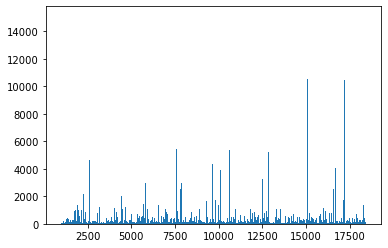

In [17]:
plt.hist(train_transaction['card1'],bins=1000)

<BarContainer object of 1 artists>

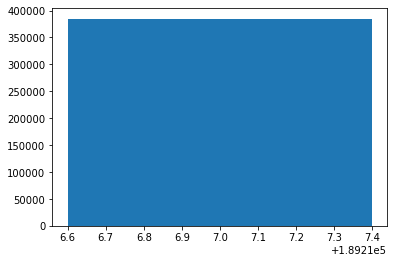

In [32]:
plt.bar(train_transaction['card4'].value_counts().index,train_transaction['card4'].value_counts()[0])

In [35]:
train_transaction['card4'].value_counts().index

Index(['visa', 'mastercard', 'american express', 'discover'], dtype='object')

In [20]:
grouped=train_transaction.groupby('addr2')
grouped.mean().sort_values(by='isFraud',ascending=False).head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,dist1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
addr2,,,,,,,,,,,,,,,,,,,,,
10.0,3.306415e+06,1.000000,7.822847e+06,118.750000,7601.875000,555.000000,165.000000,151.500000,296.000000,NaN,...,1.000000,143.750000,143.750000,143.750000,0.0,0.0,0.0,100.000000,100.000000,100.000000
82.0,3.229957e+06,1.000000,5.769768e+06,41.000000,7291.000000,555.000000,206.000000,226.000000,296.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
51.0,3.524051e+06,1.000000,1.415350e+07,50.000000,17184.750000,555.000000,118.000000,203.750000,296.000000,NaN,...,0.000000,37.500000,37.500000,37.500000,0.0,0.0,0.0,0.000000,0.000000,0.000000
46.0,3.349938e+06,1.000000,8.994240e+06,50.000000,13103.000000,277.000000,181.000000,226.000000,296.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
92.0,3.214752e+06,1.000000,5.355762e+06,60.500000,7727.500000,555.000000,160.000000,120.000000,296.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75.0,3.045098e+06,1.000000,1.351383e+06,67.000000,7122.000000,555.000000,132.000000,138.000000,296.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
38.0,3.191974e+06,0.666667,4.706779e+06,60.000000,8513.666667,555.000000,148.333333,196.333333,296.000000,NaN,...,0.333333,5.000000,5.000000,5.000000,0.0,0.0,0.0,5.000000,5.000000,5.000000
65.0,3.257842e+06,0.536585,6.745096e+06,91.925720,7131.000000,539.195122,119.756098,188.231707,288.353659,NaN,...,0.463768,123.478261,137.971014,137.971014,0.0,0.0,0.0,52.391304,55.289855,55.289855
36.0,3.374651e+06,0.500000,9.684716e+06,75.000000,8954.500000,555.000000,147.000000,195.000000,296.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [54]:
(train_transaction.P_emaildomain =="protonmail.com").sum()

76

In [16]:
grouped.mean().columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr2', 'dist1',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=379)

# ____________인코딩_#

In [43]:
## M 이 들어가는 col 먼저 인코딩(왜냐하면 값이 T또는 F)
cols=[col for col in train_transaction.columns if 'M' in col]
x_one=pd.get_dummies(train_transaction[cols],drop_first=True,dummy_na=True)
x_one

,M1_T,M1_nan,M2_T,M2_nan,M3_T,M3_nan,M4_M1,M4_M2,M4_nan,M6_T,M6_nan
0,1,0,1,0,1,0,0,1,0,1,0
1,0,1,0,1,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
590535,1,0,1,0,1,0,0,0,0,0,0
590536,1,0,0,0,0,0,0,0,0,1,0
590537,1,0,0,0,0,0,0,0,1,1,0
590538,1,0,1,0,1,0,0,0,0,1,0


In [44]:
for i in cols:
    if i[-1]!=str(4):
        print(i[-1])
        x_one.loc[x_one[i+'_nan']==1,[i+'_T']]=np.nan
        x_one.drop(x_one[[i+'_nan']],axis=1,inplace=True)
    if i[-1]==str(4):
        x_one.loc[x_one['M4_nan']==1,['M4_M1']]=np.nan
        x_one.loc[x_one['M4_nan']==1,['M4_M2']]=np.nan      
        x_one.drop(x_one[['M4_nan']],axis=1,inplace=True)

1
2
3
6


In [45]:
train_transaction[cols]

,M1,M2,M3,M4,M6
0,T,T,T,M2,T
1,NaN,NaN,NaN,M0,T
2,T,T,T,M0,F
3,NaN,NaN,NaN,M0,F
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
590535,T,T,T,M0,F
590536,T,F,F,M0,T
590537,T,F,F,NaN,T
590538,T,T,T,M0,T


In [46]:
x_one

,M1_T,M2_T,M3_T,M4_M1,M4_M2,M6_T
0,1.0,1.0,1.0,0.0,1.0,1.0
1,NaN,NaN,NaN,0.0,0.0,1.0
2,1.0,1.0,1.0,0.0,0.0,0.0
3,NaN,NaN,NaN,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,0.0
590536,1.0,0.0,0.0,0.0,0.0,1.0
590537,1.0,0.0,0.0,NaN,NaN,1.0
590538,1.0,1.0,1.0,0.0,0.0,1.0


In [48]:
train_transaction[[i for i in cols if i[-1]!=str(4)]]=x_one[['M1_T','M2_T','M3_T','M6_T']]
train_transaction[['M4_M1','M4_M2']]=x_one[['M4_M1','M4_M2']]
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V315,V316,V317,V318,V319,V320,V321,identity,M4_M1,M4_M2
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,0.0,0.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [162]:
train_transaction.drop(train_transaction[['M4']],axis=1,inplace=True)

In [152]:
## P_emaildomian 값 인코딩 해주기

train_transaction.replace({'P_emaildomain':'protonmail.com'}, {'P_emaildomain': 1},inplace=True)
train_transaction.replace({'P_emaildomain': 'mail.com'}, {'P_emaildomain': 2},inplace=True)
train_transaction.loc[(train_transaction['P_emaildomain'] !=1) & (train_transaction['P_emaildomain'] !=2),['P_emaildomain']]=0

In [167]:
train_transaction['P_emaildomain']=pd.to_numeric(train_transaction['P_emaildomain'])

In [168]:
# train_transaction[train_transaction.dtypes!=np.nan].columns
# DataFrame.select_dtypes(include=None, exclude=None)[source]

train_transaction.select_dtypes(exclude=np.number)

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
...,...,...,...
590535,W,visa,debit
590536,W,mastercard,debit
590537,W,mastercard,debit
590538,W,mastercard,debit


In [170]:
grouped=train_transaction.groupby('ProductCD')
grouped.mean()['isFraud'].sort_values()

ProductCD
W    0.020399
R    0.037826
H    0.047662
S    0.058996
C    0.116873
Name: isFraud, dtype: float64

In [174]:
productCD_D=pd.get_dummies(train_transaction['ProductCD'])
train_transaction[productCD_D.columns]=productCD_D

In [177]:
grouped=train_transaction.groupby('card4')
grouped.mean()['isFraud']

card4
american express    0.028698
discover            0.077282
mastercard          0.034331
visa                0.034756
Name: isFraud, dtype: float64

In [178]:
card4=pd.get_dummies(train_transaction['card4'])
train_transaction[card4.columns]=card4

In [179]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M4_M2,C,H,R,S,W,american express,discover,mastercard,visa
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,1.0,0,0,0,0,1,0,1,0,0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0,0,0,0,1,0,0,1,0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0,0,0,0,1,0,0,0,1
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,0.0,0,0,0,0,1,0,0,1,0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,NaN,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,0,0,0,0,1,0,0,0,1
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0,0,0,0,1,0,0,1,0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,0,0,0,0,1,0,0,1,0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,0.0,0,0,0,0,1,0,0,1,0


In [180]:
grouped=train_transaction.groupby('card6')
grouped.mean()['isFraud']

card6
charge card        0.000000
credit             0.066785
debit              0.024263
debit or credit    0.000000
Name: isFraud, dtype: float64

In [182]:
train_transaction.replace({'card6':'charge card' },{'card6':int(0)},inplace=True)
train_transaction.replace({'card6':'debit or credit'},{'card6':int(0)},inplace=True)

train_transaction.loc[train_transaction['card6']!=0,['card6']]=1


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M4_M2,C,H,R,S,W,american express,discover,mastercard,visa
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,1.0,0,0,0,0,1,0,1,0,0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0,0,0,0,1,0,0,1,0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0,0,0,0,1,0,0,0,1
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,0.0,0,0,0,0,1,0,0,1,0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,NaN,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,0,0,0,0,1,0,0,0,1
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0,0,0,0,1,0,0,1,0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,0,0,0,0,1,0,0,1,0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,0.0,0,0,0,0,1,0,0,1,0


In [185]:
train_transaction['card6']=pd.to_numeric(train_transaction['card6'])

In [188]:
train_transaction['card6'].dtypes

dtype('int64')

In [191]:
train_transaction.drop(train_transaction[['card4','ProductCD']],axis=1,inplace=True)

In [195]:
train_transaction.select_dtypes(exclude=np.number).shape

(590540, 0)

# _______________PCA_______#

In [210]:
## pca를 하기 위해서는 nan값이 없어야 하네요..ㅜㅜ

train_transaction.fillna(-1,inplace=True)

In [211]:
train_transaction.isnull().sum().sort_values(ascending=False)[:20]

TransactionID    0
V108             0
V110             0
V111             0
V112             0
V113             0
V114             0
V115             0
V116             0
V117             0
V118             0
V119             0
V120             0
V121             0
V122             0
V123             0
V124             0
V125             0
V126             0
V127             0
dtype: int64

In [346]:
# 알고보니까 이것도 변수를 변환해줘야 하잖아! 
pca=PCA(n_components=5)
pca.fit(train_transaction.drop(train_transaction[['TransactionID']],axis=1))

PCA(n_components=5)

In [347]:
train_pca=pca.fit_transform(train_transaction.drop(train_transaction[['TransactionID']],axis=1))

In [303]:
train_pcaa=pd.DataFrame()
train_pcaa['TransactionID']=train_transaction.TransactionID
train_pcaa[[i for i in range(3)]]=train_pca

In [298]:
train_pcaa

,TransactionID,0,1,2,3,4,5,6,7,8,9
0,2987000,-7.285911e+06,668.873522,-4092.000939,-30.264834,10.979284,-133.643626,12.573228,-162.018858,-5.461872,140.871388
1,2987001,-7.285910e+06,177.603938,7069.334007,-86.863110,25.370729,-105.926203,-118.846804,-114.119239,-27.495167,145.781107
2,2987002,-7.285842e+06,231.560698,5162.210050,-91.671524,24.747079,-101.331410,-89.620370,-75.631094,-8.136888,-96.158600
3,2987003,-7.285812e+06,3933.826831,-8210.071223,1031.501899,747.730946,-259.693433,516.245021,113.615756,72.834445,20.128657
4,2987004,-7.285805e+06,227.219804,5327.990356,-92.490715,23.947578,-104.105710,-115.359981,-111.593588,-26.365618,145.630551
...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,8.438735e+06,-2121.201590,3385.128646,-66.253945,-64.907442,-142.393694,-77.814845,-126.837117,-23.755292,201.017851
590536,3577536,8.438737e+06,-2048.942673,-508.523796,-103.205564,-80.397881,-170.220361,-142.212443,-193.771533,-38.883711,274.751106
590537,3577537,8.438767e+06,-2003.456948,-2101.024359,-108.148409,-82.129522,-169.449624,-141.584629,-193.968983,-39.701613,275.564522
590538,3577538,8.438777e+06,665.205384,2184.131421,2168.459507,-1054.772004,81.923599,1193.378256,-101.566265,-12.756964,494.054411


# __________________드디어 실행___#

In [348]:
## 까먹고 변수 변환을 안했넹 ㅎㅎ;;

from sklearn.ensemble import IsolationForest

clf=IsolationForest(random_state=1022)
clf.fit(train_pcaa)
predict=clf.predict(train_pcaa)

train_y['predict']=predict

<ipython-input-348-e881d85ded6a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['predict']=predict


In [351]:
## pca 실행  했을 때 (component=5)
pd.crosstab(index=train_y['predict'], columns=train_y['isFraud'])

isFraud,0,1
predict,,
-1,131634,5772
1,438243,14891


In [305]:
## pca 실행  했을 때 (component=3)
pd.crosstab(index=train_y['predict'], columns=train_y['isFraud'])

isFraud,0,1
predict,,
-1,133306,5889
1,436571,14774


In [300]:
## pca 실행  했을 때 (component=10)
pd.crosstab(index=train_y['predict'], columns=train_y['isFraud'])

isFraud,0,1
predict,,
-1,37417,2628
1,532460,18035


In [252]:
## pca 실행 안 했을 때 
pd.crosstab(index=train_y['predict'], columns=train_y['isFraud'])

isFraud,0,1
predict,,
-1,19391,3492
1,550486,17171


In [ ]:
## 놀랍게도 pca를 시행하고 나니까 정확도가 더 줄었다 그럼 아까 전에 무식하게 200개를 돌렸을 때가 더 낫다는 말이야? 

In [258]:
original=pd.read_csv(PATH+"train_transaction.csv")

In [264]:
clf=IsolationForest()
clf.fit(train_transaction.drop(train_transaction[['isFraud']],axis=1))

predict=clf.predict(train_transaction.drop(train_transaction[['isFraud']],axis=1))

train_y['predict']=predict

<ipython-input-264-e9d64ae497ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['predict']=predict


In [265]:
## 전처리를 하나도 안 했을 때 
pd.crosstab(index=train_y['predict'], columns=train_y['isFraud'])

isFraud,0,1
predict,,
-1,18126,3072
1,551751,17591


In [282]:
## 결과 탭


iforest_result=pd.DataFrame({'아무것도 안 했을 때':[93.95, 14, 14.5, 14.25],
                            '전처리 했을 때':[93.8, 16, 15.3,15.64],
                           'PCA 까지 했을 때': [92.3, 9, 6,7.2]})
iforest_result.index=['정확도','재현율','정밀도','F1score']


In [285]:
iforest_result

,아무것도 안 했을 때,전처리 했을 때,PCA 까지 했을 때
정확도,93.95,93.80,92.3
재현율,14.00,16.00,9.0
정밀도,14.50,15.30,6.0
F1score,14.25,15.64,7.2


In [287]:
train_transaction.shape

(590540, 229)

In [307]:
clf.score_samples(train_pcaa)

array([-0.58260321, -0.59188421, -0.57837684, ..., -0.57622115,
       -0.63044863, -0.58648539])

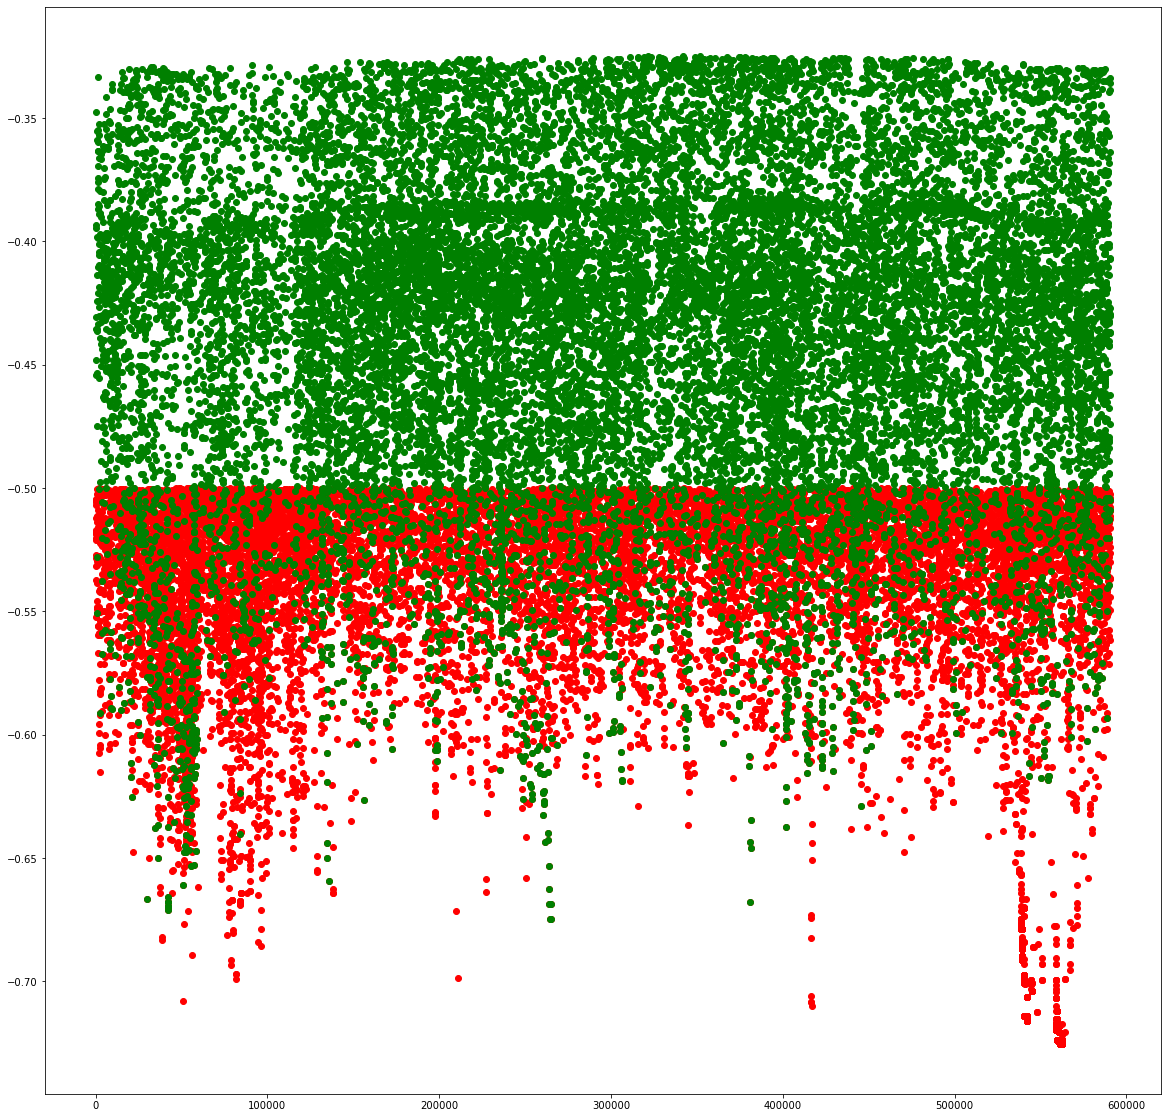

In [342]:
## 전처리만 한 데이터  

fig=plt.figure(figsize=(20,20))
#plt.plot(train_transaction.index,clf.score_samples(train_pcaa))
plt.scatter(train_y.loc[train_y['predict']==-1].index,
            clf.score_samples(train_transaction.drop(train_transaction[['isFraud']],axis=1))[train_y.loc[train_y['predict']==-1].index],color="red")
plt.scatter(train_y.loc[train_y['isFraud']==1].index,
            clf.score_samples(train_transaction.drop(train_transaction[['isFraud']],axis=1))[train_y.loc[train_y['isFraud']==1].index],color="green")

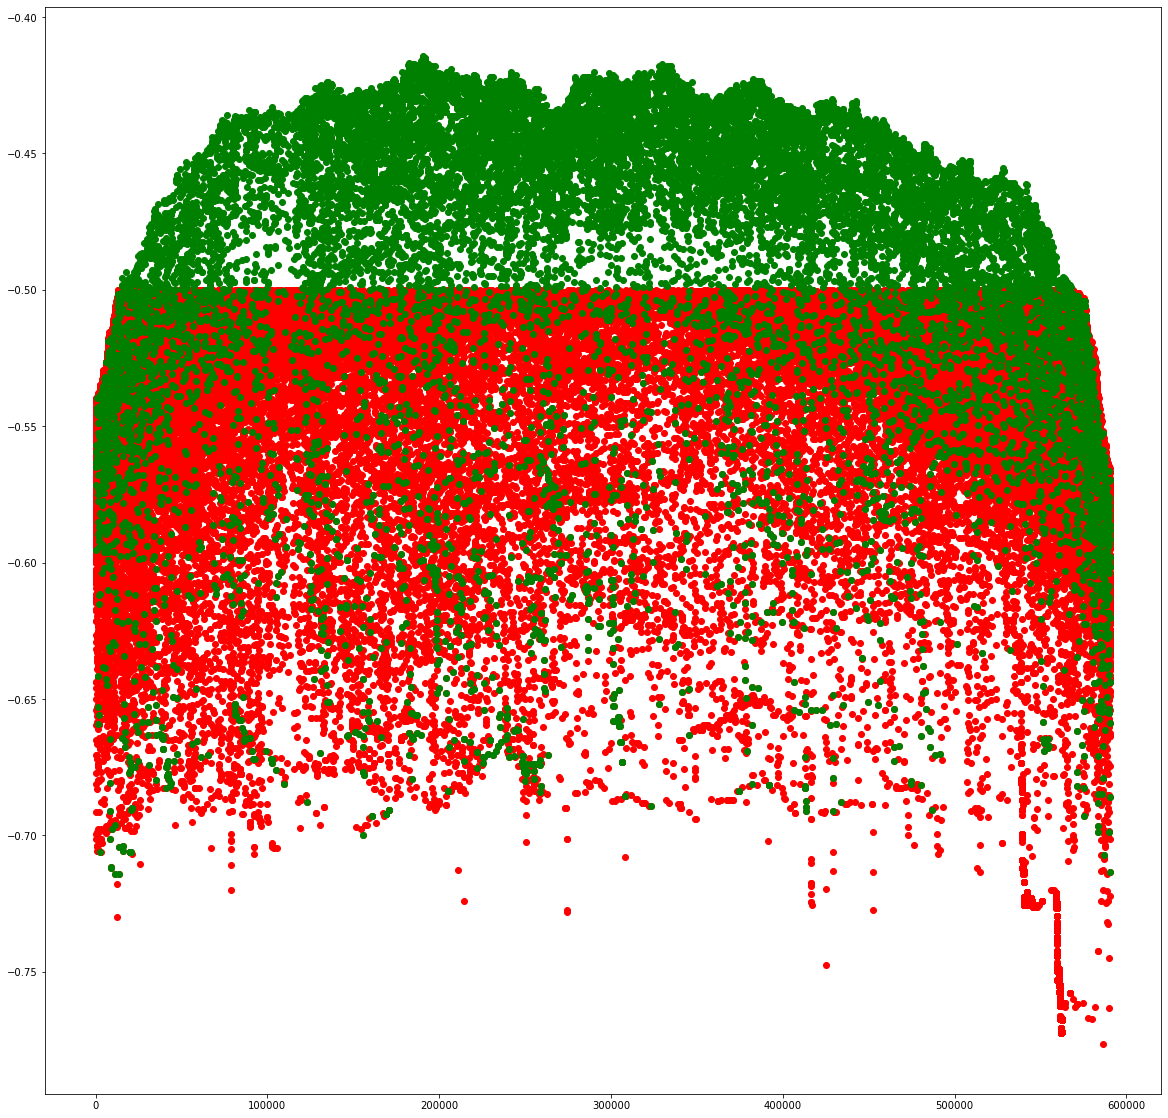

In [350]:
## pca 했을 때 

fig=plt.figure(figsize=(20,20))
#plt.plot(train_transaction.index,clf.score_samples(train_pcaa))
plt.scatter(train_y.loc[train_y['predict']==-1].index,
            clf.score_samples(train_pcaa)[train_y.loc[train_y['predict']==-1].index],color="red")
plt.scatter(train_y.loc[train_y['isFraud']==1].index,
            clf.score_samples(train_pcaa)[train_y.loc[train_y['isFraud']==1].index],color="green")

In [352]:
## 그렇다면 이제는 lof를 그려볼 차례


from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors)
predict=clf.fit_predict(train_pcaa)

train_y['predict']=predict

<ipython-input-352-c3bbe6820293>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_y['predict']=predict


In [353]:
pd.crosstab(index=train_y['predict'], columns=train_y['isFraud'])

isFraud,0,1
predict,,
-1,12954,1451
1,556923,19212


In [354]:
## pca 했을 때 

fig=plt.figure(figsize=(20,20))
#plt.plot(train_transaction.index,clf.score_samples(train_pcaa))
plt.scatter(train_y.loc[train_y['predict']==-1].index,
            clf.score_samples(train_pcaa)[train_y.loc[train_y['predict']==-1].index],color="red")
plt.scatter(train_y.loc[train_y['isFraud']==1].index,
            clf.score_samples(train_pcaa)[train_y.loc[train_y['isFraud']==1].index],color="green")

AttributeError: score_samples is not available when novelty=False. The scores of the training samples are always available through the negative_outlier_factor_ attribute. Use novelty=True if you want to use LOF for novelty detection and compute score_samples for new unseen data.

<Figure size 1440x1440 with 0 Axes>